# Assignment - LinearModeling
## Name: Mohammad Sahil
## U-Number: U08679713

## Import the libraries we will use in this notebook

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

: 

##  Load the given data that we will model

There is some issue directly using the git hub link, so I have downloaded the data and used that file

In [ ]:
df = pd.read_csv('/Users/mohammadsahilshaik/Workspace/assignmentdata.csv')

df.head(3)

,X,y
0,4.87,56.566624
1,-1.84,-15.462945
2,-1.58,-3.970165


Seperate out the input m(X) and the target (y)

In [ ]:
X=df[['X']]
y=df['y']

In [ ]:
df.head(3)

,X,y
0,4.87,56.566624
1,-1.84,-15.462945
2,-1.58,-3.970165


From the above data there are two columns Feature 'X' and Target 'y'

In [ ]:
df.info()

: 

In [6]:
df.describe()

,X,y
count,1000.000000,1000.000000
mean,0.116370,27.003831
std,2.944388,40.131657
min,-9.160000,-22.695104
25%,-1.800000,-0.145379
50%,0.125000,20.290481
75%,2.110000,34.579403
max,11.880000,415.937192


## Explore the given data

Let's visualize this data to see what it looks like.

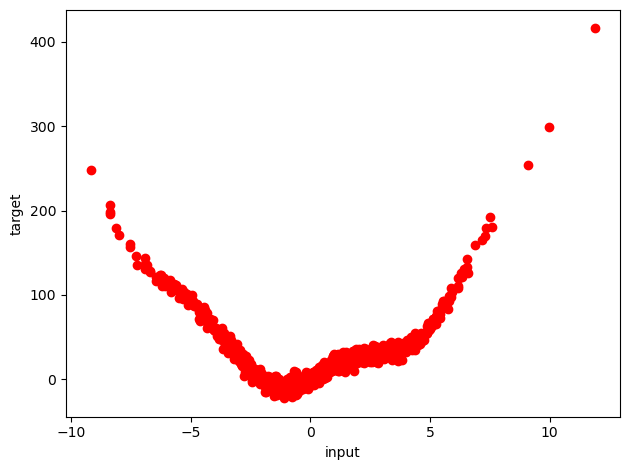

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

From the above scatterplot, We can clearly see that there is some curvature and quadratic patterns between the target and input. So, before applying a linear regression model, the following transformations should be done to capture the underlying non-linear relationships:

Adding sin(x) feature: Captures any periodic or oscillatory patterns in the data, helping the model account for cyclical behavior.

Adding x**2 feature: Addresses the quadratic relationship seen in the "U"-shaped scatter plot, capturing the non-linear trend and curvature.

These transformations enable the linear regression model to better handle non-linearities by making the relationship between features and the target more linear, thereby improving model performance.

## Data Transformation

Applying transformations to the 'X' feature from the original DataFrame to create a new DataFrame 'X_transformed'.

In [8]:
X_transformed = pd.DataFrame({'x1': df.X, 'x2':df['X']**2, 'x3':np.sin(df.X)})

## Fit the Model

Fitting the linear regression model to the transformed data.

In [9]:
lin_reg = LinearRegression().fit(X_transformed,y) # fit the model
lin_reg


LinearRegression()

## Analyze the linear regression model's performance

### Visualize the linear regression model results

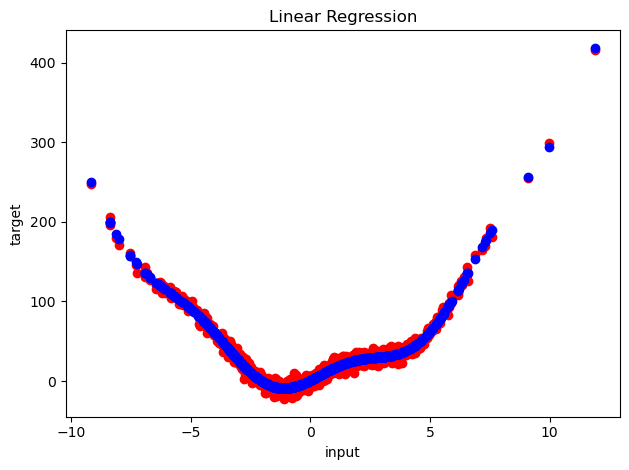

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X, lin_reg.predict(X_transformed), color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

The plot demonstrates a linear regression model applied to the transformed data.The blue predicted line closely follows the trend of the red data points across the entire range of input values. This indicates that the model is effectively capturing the non-linear relationship between the input and the target.

The model captures the "U"-shaped curve.This suggests that the quadratic transformation (x**2) has successfully modeled the curved relationship seen in the data.

The sine transformation seems to improve the model's ability to capture the slight wave-like variations, particularly noticeable in regions with small oscillations in the data.

Overall, the points are being captured accurately by the model, reflecting that the combination of sin(x) and (x**2) transformations has enabled the linear regression model to address the underlying non-linearities and periodic behaviors in the dataset effectively.

### visualize the residuals (errors) of the model

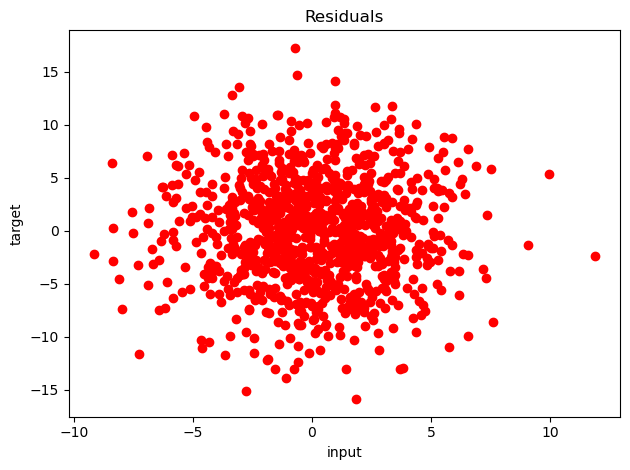

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y-lin_reg.predict(X_transformed), color='red')

ax.set_title('Residuals')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()


From the above residual scatterplot we can clearly say that they are distributed randomly with no apparent correlation, it indicates that the regression model used is a good fit for the data.

### Visualize actual vs predicted values

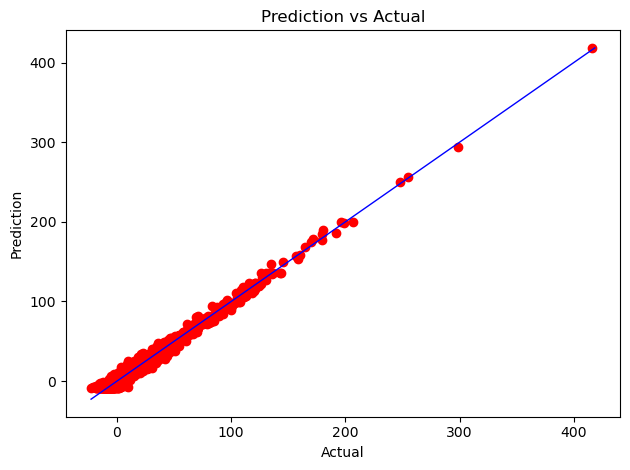

In [12]:
# use scatter plot to show prediction versus actual then add a line indicating perfect prediction
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(y, lin_reg.predict(X_transformed), color='red')

# Plotting the perfect prediction line
min_val = min(min(y), min(lin_reg.predict(X_transformed)))
max_val = max(max(y), max(lin_reg.predict(X_transformed)))
ax.plot([min_val, max_val], [min_val, max_val], color='blue', linewidth=1)

ax.set_title('Prediction vs Actual')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
plt.tight_layout()
plt.show()


From the above plot we can visualize the actual vs predicted points in a scatterplot are very close to the diagonal line, it suggests that the model’s prediction is very near to the actual values. This indicates a strong fit between the model and the data.

### Visualize the distribution of residuals

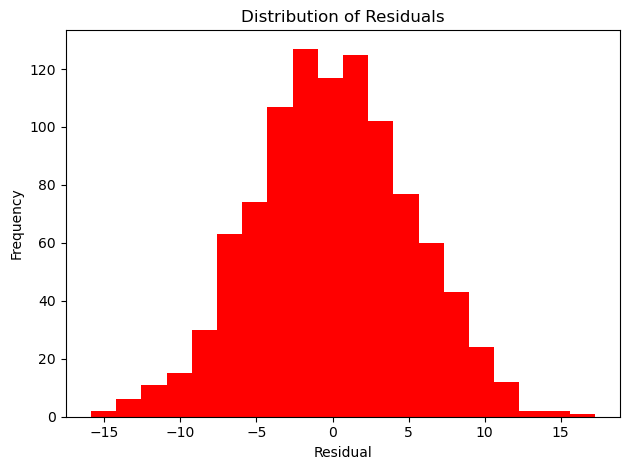

In [13]:
# Distribution of residuals

fig = plt.figure()
ax = fig.add_subplot()

ax.hist(y-lin_reg.predict(X_transformed), bins=20, color='red')

ax.set_title('Distribution of Residuals')
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


From the histogram, we can see that the residuals follow a normal distribution. This tells us that the model's errors are behaving as expected. It means the model’s assumptions are likely correct and that the model is making good inferences.

### Identify model coefficients and model performance

... using fstring formatting, we can display these values as follows...

Print the coefficients of the model 

In [14]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_[0]
b2 = lin_reg.coef_[1]
b3 = lin_reg.coef_[2]
r2 = lin_reg.score(X_transformed, y)

print(f"Y = {b0:.2f} + {b1:.2f}x +{b2:.2f}x^2 +{b3:.2f}sinx")

Y = 0.94 + 0.04x +3.02x^2 +15.02sinx


Display common performance metrics

In [15]:
print(f"R^2: {lin_reg.score(X_transformed, y):.3f}") 
print(f"Adjusted R^2: {1 - (1-r2)*(len(y)-1)/(len(y)-X_transformed.shape[1]-1):.3f}")
print(f"MSE: {np.mean((lin_reg.predict(X_transformed) - y)**2):.2f}")
print(f"RMSE: {np.sqrt(np.mean((lin_reg.predict(X_transformed) - y)**2)):.2f}")
print(f"MAE: {np.mean(np.abs(lin_reg.predict(X_transformed) - y)):.2f}")

R^2: 0.984
Adjusted R^2: 0.984
MSE: 26.43
RMSE: 5.14
MAE: 4.13


From the metrics, higher R² and adjusted R² values, combined with lower MSE, RMSE, and MAE, suggest that the model performs well and makes accurate predictions.

## Conclusions

By adding feature transformations like sin(x) and x² terms, the linear regression model becomes much better at capturing non-linear patterns in the data. These changes help the model understand complex relationships and fit the data more closely. This improvement is clear: the prediction line aligns closely with the actual data points, the residuals are randomly distributed, and the predicted values match well with the actual values.

The model's accuracy is supported by the metrics: an R² of 0.984 and an adjusted R² of 0.984 show a strong fit, while the MSE of 26.43, RMSE of 5.14, and MAE of 4.13 indicate low prediction errors. Additionally, the normal distribution of residuals confirms the model’s assumptions are valid. Overall, these enhancements allow the model to handle non-linear patterns effectively, resulting in a solid and reliable fit.